In [200]:
df_name = './tmp_data/merged_api_impression.csv'

In [201]:
df = pd.read_csv(df_name)

In [186]:
df.head()

,img_name,smile,gender,age,glasses,anger,contempt,disgust,fear,happiness,...,aggressive,responsible,sociable,e_id,vc binary,vc fund,total binary,total fund,IPO,success
0,e9585_cb.jpg,1.000,male,38.4,NoGlasses,0.000,0.000,0.000,0.0,1.000,...,2.867631,5.379671,6.794107,e9585,1,6.812913,1,6.812913,0.0,1
1,e13481_cb.jpg,0.915,male,28.0,NoGlasses,0.000,0.018,0.000,0.0,0.915,...,3.021806,5.616705,5.831418,e13481,0,0.000000,0,0.000000,0.0,0
2,e12682_cb.jpg,0.998,male,34.9,NoGlasses,0.000,0.000,0.000,0.0,0.998,...,4.004849,4.885920,5.338368,e12682,0,0.000000,0,0.000000,0.0,0
3,e1710_cb.jpg,0.460,male,45.8,ReadingGlasses,0.001,0.019,0.001,0.0,0.460,...,3.790722,5.279909,5.433563,e1710,1,6.806180,1,6.806180,0.0,1
4,e5894_cb.jpg,0.023,male,18.2,NoGlasses,0.002,0.015,0.000,0.0,0.023,...,3.401689,4.827846,5.999139,e5894,0,0.000000,0,0.000000,0.0,0


In [202]:
df_impression_only = df[feature_lst]

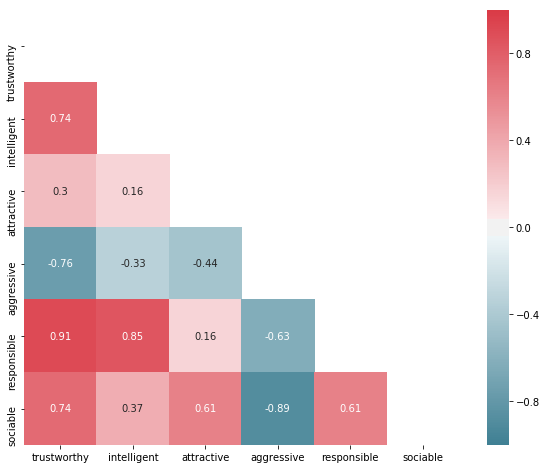

In [203]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_impression_only.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1, annot=True)
plt.savefig('/home/amanda/Documents/vgg_model/2k_feat/may_7/heat_map_of_impression_E_old.jpg')

<Figure size 432x288 with 0 Axes>

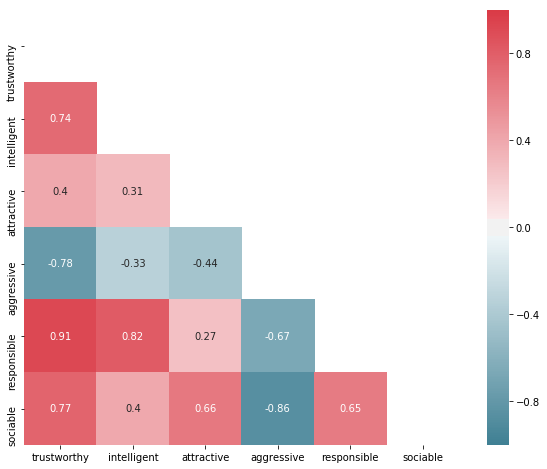

In [206]:
female_only = df[df['gender']=='female']
female_impression = female_only[feature_lst]


fig = plt.figure()

title_str = 'Female'
fig.suptitle(title_str, fontsize=20)
f, ax = plt.subplots(figsize=(10, 8))
corr = female_impression.corr()
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1, annot=True)
plt.savefig('/home/amanda/Documents/vgg_model/2k_feat/may_7/visualization/impression_female_E.jpg')

<Figure size 432x288 with 0 Axes>

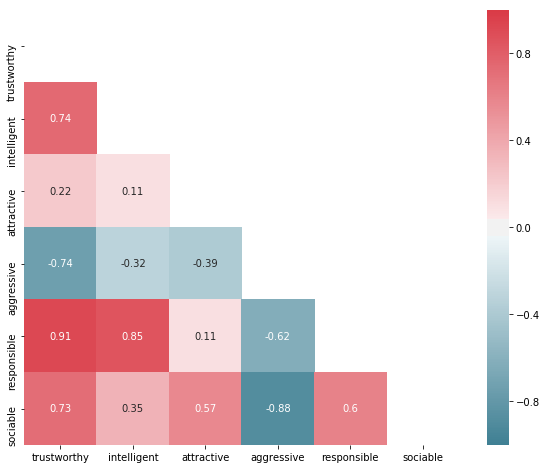

In [208]:
male_only = df[df['gender']=='male']
male_impression = male_only[feature_lst]


fig = plt.figure()

f, ax = plt.subplots(figsize=(10, 8))
corr = male_impression.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1, annot=True)
plt.savefig('/home/amanda/Documents/vgg_model/2k_feat/may_7/visualization/impression_male_E.jpg')

In [210]:
# experiment with gender. 
sum(df['gender']=='female')

899

In [213]:
sum(df[df['gender']=='female' & df['success']==1])

TypeError: cannot compare a dtyped [int64] array with a scalar of type [bool]

In [221]:
sum(df['IPO']==1)

203

In [222]:
(203/7800.)

0.026025641025641026

In [216]:
899/7800.

0.11525641025641026

In [224]:
ind1 = df['gender']=='male'
ind2 = df['IPO']==1
sum(ind1 & ind2)

194

In [226]:
9/899.

0.010011123470522803

In [225]:
194/6901.

0.02811186784523982

In [232]:
# female success, female fail
from scipy.stats import ttest_ind

female_df = df[df['gender']=='female']
fe_su = female_df[female_df['success'] == 1]
fe_fa = female_df[female_df['success'] == 0]

for cur_attri in feature_lst:
    print('\n\n')
    print cur_attri
    t, p = ttest_ind(fe_su[cur_attri], fe_fa[cur_attri])
    print t, p 
    print('\n')
    print fe_su[cur_attri].mean(), fe_fa[cur_attri].mean()
    print fe_su[cur_attri].std(), fe_fa[cur_attri].std()





trustworthy
3.4257577383831945 0.0006409161925710544


5.744375762251656 5.6101122000000005
0.5426838209850087 0.5611541202726019



intelligent
0.2050996273716553 0.8375408194514458


5.490810815562914 5.48430235443886
0.4286357366864923 0.4595167560403539



attractive
0.6703535012935462 0.5028050140081646


5.770490503973511 5.733286153433836
0.7216847146004216 0.8165009904705031



aggressive
-2.7006709775308724 0.007050393327775544


2.6837575629139074 2.8204939579564487
0.7045756587195927 0.7232036544995859



responsible
2.7353629784779523 0.006354129051031331


5.682237259271523 5.588738553768844
0.46139702668277077 0.4951151271079815



sociable
2.0927063764489917 0.03665585194344716


6.541054056622516 6.429619813065327
0.7098884355777911 0.7754511992417532
